In [2]:
from scipy.stats import bernoulli, binom, geom, hypergeom, poisson
import matplotlib.pyplot as plt
import pandas as pd

# Discrete Probability Distribution

Descrete random variables can take on a <strong>countable</strong> number of possible values. Examples on descreta random variables:
* The number of fours if a dice is tossed 20 times 
* Number of heads when a coin is tossed twice

#### The probability distriution of a discrete random variable X is a listing of all possible values of X and their probabilities of occuring. 

All discrete probability distributions must satisfy:
1. $ 0 \leq p(x) \leq 1 $ for all x
2. $ \sum_{all x} p(x)= 1$ 

The formula used to calculate the probability of occuring is called <strong>probability mass function</strong>. 

The expected value E(X) is calculated as: 
$$ E(X) = \sum_{i=1}^{n}x_{i}.p(x_{i}) $$
Note it's usually not a possible value but just an arithmetic mean of the distribution.

Variance $$ \sigma^{2} = E[(X - \mu)^{2}] = \sum_{i=1}^{n}(x_{i} - \mu).p(x_{i}) = E(X^{2}) - [E(X)]^{2} $$ 

The expectation of a mathematical function of x - g(x):
$$ E[g(x)] = \sum_{i=1}^{n}g(x_{i}).p(x_{i}) $$
$$  $$

## Bernoulli Distribution

<strong>One</strong> trial. There two possible outcomes - success and failure.

The probability mass function of success is $ P(X=1) = p $
And the probability mass function of failure is $ P(X=0) = 1- p $.

The <strong>mean</strong> is $ E(X) = p $

<strong>Variance</strong> is calculated as $ \sigma^{2} = p(1 - p) $

<strong>Example. 1</strong> 1 in 200 balls in a urn is black, the rest are white. What is the probability to draw a black ball if we have only one trial? 

Black ball to be drawn
$$ P(X = 1) = 1 / 200 = 0.005 $$

White ball to be drawn
$$ P(X = 0) = 199 / 200 = 0.995 $$

In [3]:
black_ball_prob = 1 / 200
bernoulli_dist = bernoulli(black_ball_prob)
bernoulli_dist.pmf(1)

0.005000000000000002

## Binomial Distribution

* There are <strong>independent</strong> Bernoulli trials - <strong>with replacement</strong>
* There are <strong>two</strong> possible outcomes, labelled success and failure 

Answers the question: "What is the probibily of x number of successes in n independent Bernoulli trials?", for example "What is the probability to toss 3 heads in 10 coin tosses?"

The <strong>probability mass function</strong> is calculated using the <strong>Bernoully formula</strong>:
$$ P_{n}^{k}(X=k) = \binom{n}{k} p^{k}(1 - p)^{n-k} $$
where $ \binom{n}{k} $ is the <strong>combinations formula</strong> also known as <strong>binomial coefficient</strong> : $$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$

- n - number of independent trials
- P(Success) = p
- P(Failure) = 1 - p
- k* - number of successes in n trials

* can be notated as x

The <strong>mean</strong> ($ \mu $) of binomial distribution:
$$ \mu = np $$

The <strong>variance</strong> ($ \sigma^{2} $) of binomial distribution:
$$ \sigma^{2} = np(1 - p) $$

<strong>Example. 1</strong> 
If we flip a coin, it would either be head or tail. Normal probability is <strong>0.5</strong> for both P(head) and p(tail). In binomial terms we say P(head) is the probability of a head showing up in a trial and (1 - P(head)) if head doesn’t show up.

We flip a coin 6 times. What is the probability to have exactly 3 heads?

$$ P_{6}^{3} = \frac{6!}{3!(6 - 3)!} 0.5^{3}(1 - 0.5)^{(6 - 3)} = 0.3125 $$

In [8]:
# Define the binomial distribution

n = 6
p = 0.5
binom_dist_1 = binom(6, 0.5)

binom_dist_x_1 = range(7)
binom_dist_x_probabilities_1 = binom_dist_1.pmf(binom_dist_x_1)

In [9]:
# The probability for having exactly 3 heads is 0.3125 as calculated above
binom_dist_1.pmf(3)

0.3125000000000002

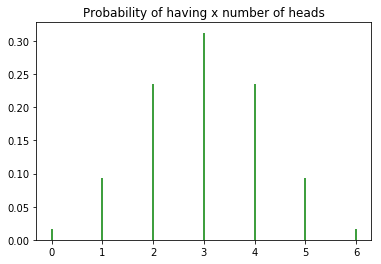

In [11]:
# Plot the distribution 

plt.vlines(binom_dist_x_1, 0, binom_dist_x_probabilities_1, color='green', linestyles='-')
plt.title('Probability of having x number of heads') # Show the legend and remove the frame around it
plt.ylim(ymin=0) # Set y axis to start at 0
plt.show()

<strong>Example. 2</strong> A dice is tossed 5 times. What is the probability of getting 2 fours?

Probability of getting a four, as every other side of the dice, is $ \frac{1}{6} $. Therefore, using Bernoulli formula, the probability of getting 2 fours is 0.1608.

$$ P_{5}^{2} = \frac{5!}{2!(5 - 2)!} (\frac{1}{6})^{2}(1 - \frac{1}{6})^{(5 - 2)} = 0.1608 $$

In [47]:
10 * ((1 / 6) ** 2) * (5 / 6) ** 3

0.1607510288065844

In [13]:
n = 5
toss_four_prob = 1 / 6
binom_dist_2 = binom(n, toss_four_prob)

binom_dist_x_2 = range(6)
binom_dist_x_probabilities_2 = binom_dist_2.pmf(binom_dist_x_2) 

In [14]:
# The probability of getting 2 fours is 1.60751029e-01 or 0.1608
binom_dist_2.pmf(2)

0.16075102880658435

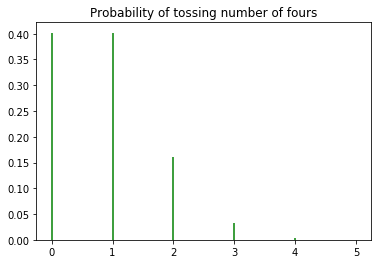

In [15]:
plt.vlines(binom_dist_x_2, 0, binom_dist_x_probabilities_2, color='green')
plt.title('Probability of tossing number of fours')
plt.ylim(ymin=0) # Set y axis to start at 0
plt.show()

## Geometric distribution

The distribution of the <strong>number of trials needed to get the first success</strong> in repeated Bernoulli trials. It's closely related to the Binomial distribution.

The <strong>probability mass function</strong> is:
$$ P(X = k) = p (1 - p)^{k - 1} $$

- P(Success) = p
- P(Failure) = (1 - p)
- k - number of trials to get the first success
- (k - 1) is the number of failures before the first success.

The <strong>cumulative probability function</strong> is:
$$ P(X \leq k) = 1 - (1 - p)^{k} $$

The <strong>mean</strong> ($ \mu $) of geometric distribution:
$$ \mu = \frac{1}{p} $$

<strong>The mode is always 1(one).</strong>

The <strong>variance</strong> ($ \sigma^{2} $) of geometric distribution: 
$$ \sigma^{2} = \frac{1 - p}{p^{2}} $$

<strong> Example. 1</strong> In a large population of adult, 30% have receive CPR training. 
What is the probability that the 6th person sampled is the first that has received CPR training? Adults are randomly selected.

Five time must be sampled people who have not received any CPR training. The probability of sampling CPR trained person is 0.3. 

$$ P(X = 6) = 0.3(1 - 0.3)^{5} = 0.050421 $$

In [16]:
# Define the geometric distribution for up to 15 people
cpr_prob = 0.3
geometric_dist_1 = geom(cpr_prob)

geom_x_1 = range(15)
geom_x_probabilities_1 = geometric_dist_1.pmf(geom_x_1)

In [17]:
# The probability to sample the fisrt person that has received CPR training on the 6th trial is 0.050421

geometric_dist_1.pmf(6)

0.05042099999999998

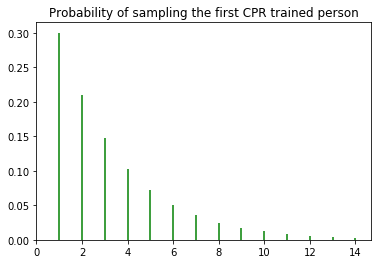

In [18]:
# Plot the geometric distribution

plt.vlines(geom_x_1, 0, geom_x_probabilities_1, color='green')

plt.title('Probability of sampling the first CPR trained person') 
plt.ylim(ymin=0) # Start of y axis at 0 
plt.xlim(xmin=0) # Start of x axis at 0 
plt.show()

<strong>Example. 2</strong> Marketing agency conducts a survey in a bank. Since, based on previous surveys, the percentage of unhappy clients is 10%, what is the probability to interview 15 happy clients until the first unhappy to be surveyed.   

$$ P(X = 16) = 0.1(1 - 0.1)^{15} = 0.020589 $$

In [19]:
unhappy_client_prob = 0.1
geom_dist_2 = geom(unhappy_client_prob)

geom_x_2 = range(17)
geom_x_probabilities_2 = geom_dist_2.pmf(geom_x_2)

In [20]:
# The probability 16th interviewed person to be the first unhappy client is 0.020589
geom_dist_2.pmf(16)

0.02058911320946491

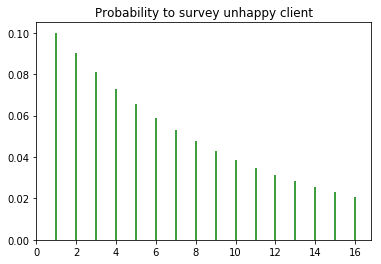

In [21]:
# Plot the distribution

plt.vlines(geom_x_2, 0 , geom_x_probabilities_2, color='green')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.title('Probability to survey unhappy client')
plt.show()

## Hypergeometric distribution

* There are <strong>dependent</strong> Bernoulli trials - <strong>without replacement</strong>
* There are <strong>two</strong> possible outcomes, labelled success and failure

Answers the question: "If we are randomly sampling n objects from without replacement source , what is the probability to ", for example ""

The <strong>probability mass function</strong> is calculated as:
$$ P_{n}^{k}(X=k) = \frac{\binom{a}{k} \binom{N-a}{n-k}}{\binom{N}{n}} $$
where $ \binom{n}{k} $ is the <strong>combinations formula</strong> also known as <strong>binomial coefficient</strong> : $$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$

- a - total number of successes in the source
- k* - number of sampled successes
- N - total number of objects in the source
- n - total number of sampled objects

* can be notated as x

All combinations can be interpred as follows:

$ \binom{a}{k} $ Possible combinations of sampled successes (k) from all successes in the source (a) 

$ \binom{N-a}{n-k} $ Possible combinations of sampled failures (n - k) from all successes in the source (N - a)

$ \binom{N}{n} $ Possible combinations of sampled objects (n) from all objects in the source (N)

The <strong>mean</strong> ($ \mu $) of binomial distribution:
$$ \mu = np $$

The <strong>variance</strong> ($ \sigma^{2} $) of binomial distribution:
$$ \sigma^{2} = np(1 - p) $$

#### The binomial distribution can provide a reasonable aproximation to the hypergeometric distribution. 
If we are not sampling more than 5% of the population, the binomial provides a very good aproximation. The reason is that the binomial   

<strong>Example. 1</strong> An urn contains 6 red balls and 14 yellow balls. 5 balls are randomly drawn without replacement. What is the probability exactly 4 red balls to be drawn?

$$ P(X=4) = \frac{\binom{6}{4} \binom{14}{1}}{\binom{20}{5}} = 0.013545 $$

In [22]:
# Define the distribution
red_balls_source = 6
all_balls = 20
sampled_balls = 5

hypergeom_dist_1 = hypergeom(M=all_balls, n=red_balls_source, N=sampled_balls)

hypergeom_x_1 = range(sampled_balls + 1)
hypergeom_x_probabilities_1 = hypergeom_dist_1.pmf(hypergeom_x_1)

In [23]:
# The probability to to sample 4 red balls out of 5 is 0.01354489164086685. 
hypergeom_dist_1.pmf(4)

0.01354489164086685

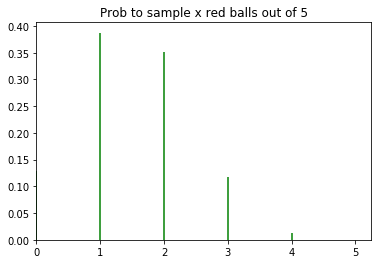

In [24]:
# Plot the distribution

plt.vlines(hypergeom_x_1, 0, hypergeom_x_probabilities_1, color='green')
plt.title('Prob to sample x red balls out of 5')
plt.xlim(xmin=0)
plt.ylim(ymin=0)
plt.show()

## Poisson distribution

Poisson distribution is used for <strong>very rare</strong> events. It gives the probability of number of occurences of a event in a given unit of time, distance, area, etc. 

* Events are occuring independently and randomly
* There are two possible outcomes

The difference with binomial distribution is that in binomial the number of attempts is known (n), and each of those has a probability of success p. In poisson distribution the number of events is very large/continuous and the probability of success is very small (e.g. number of wrongful criminal convictions in a country, the number of dandelions in a square meter, etc.). In short, the binomial distribution counts descrete number of events in a a descrete number of attempts, the poisson distribution counts descrete number of events among a continuous domain.

The probability mass function:

$$ P(X=k) = \frac{\lambda^{k}e^{-\lambda}}{k!} $$

$\lambda $ - np
k - number of successes

The <strong>mean</strong> is $ \mu = \lambda $

The <strong>variance</strong> is $ \sigma^{2} = \lambda $

<strong>Example. 1</strong> A life insurance salesman sells on the average 3 life insurance policies per week. Use Poisson's law to calculate the probability that in a given week he will sell

$$ \lambda = 3 $$

* 2 policies
$$ P(k=2) = \frac{3^{2} e^{-3}}{2!} $$

* Some policies
$$ P(k>0) = 1 - P(xk0) $$
$$ P(k=0) = \frac{3^{0} e^{-3}}{0!} = 0.0498 $$
$$ P(k>0) = 1 - 0.0498 = 0.9502 $$

In [25]:
ins_lambda = 3
poisson_dist_1 = poisson(ins_lambda)

poisson_dist_x_1 = range(11)
poisson_dist_x_probabilities_1 = poisson_dist_1.pmf(poisson_dist_x_1)

In [26]:
# The probability of selling 0 insurances in a week is very low - 0.0498
poisson_dist_1.pmf(0)

0.049787068367863944

In [27]:
# The probability of selling exactly 2 insurances in a week is ~ 22.40% 
poisson_dist_1.pmf(2)

0.22404180765538775

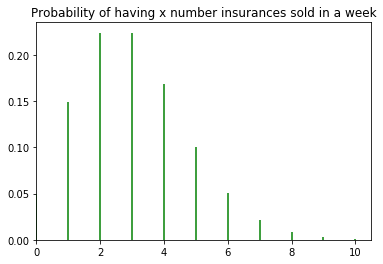

In [28]:
# Plot the distribution
plt.vlines(poisson_dist_x_1, 0, 
           poisson_dist_x_probabilities_1, 
           color='green')
plt.title('Probability of having x number insurances sold in a week')
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.show()